In [1]:
library(NMF)

Loading required package: registry

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [NO: bigmemory] | Cores 2/2

  To enable shared memory capabilities, try: install.extras('
NMF
')



In [2]:
data <- read.table("DNAme3CPM.tsv", header = TRUE, sep = "\t", row.names = 1 )
head(data)

,D00,D04,D07,ENP1,ENP2,ENP3,ENP.Alpha,PP1_2,SC.Alpha_D22,SC.Alpha,SC.Beta,SC.EC
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1:9838-10289,1.2854503,37.703722,15.2317240,21.916367,49.790052,0.000000,2.5709006,3.648747,0.000000,0.000000,5.4790918,4.0914772
chr1:17004-17296,19.1784116,4.083012,212.9018522,3.380937,2.416223,2.550116,2.2128936,7.145270,851.607409,0.000000,0.8452342,2.5501162
chr1:28423-28779,6.8542758,11.345936,43.8327343,0.000000,1.285450,2.432498,0.7615862,0.000000,10.958184,0.000000,10.2286931,0.0000000
chr1:39794-40086,0.0000000,0.000000,0.8452342,0.000000,0.000000,1.020753,0.0000000,0.000000,0.000000,0.000000,15.3006969,0.0000000
chr1:56786-57076,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.000000,0.0000000,0.000000,10.228693,0.000000,0.0000000,0.0000000
chr1:98881-99218,0.8452342,2.416223,7.6503485,0.000000,1703.214818,4.273519,7.6071081,4.832447,2.550116,2.950525,2.0415059,0.8547038


In [3]:
dim(data)

[1] 158194     12

In [4]:
num_clusters <- 12

nmf_result <- nmf(data, rank = num_clusters)

In [15]:
#nmf_result <- readRDS("nmf_DNAme3.rds")

In [5]:
print(colnames(nmf_result))
new_col <- c("D00", "D04", "D07", "ENP1", "ENP2", "ENP3", "ENP_alpha", "PP1-2", "SC_alpha D22", "SC_alpha", "SC_beta", "SCEC")
colnames(nmf_result) <- new_col
print(colnames(nmf_result))

 [1] "D00"          "D04"          "D07"          "ENP1"         "ENP2"        
 [6] "ENP3"         "ENP.Alpha"    "PP1_2"        "SC.Alpha_D22" "SC.Alpha"    
[11] "SC.Beta"      "SC.EC"       
 [1] "D00"          "D04"          "D07"          "ENP1"         "ENP2"        
 [6] "ENP3"         "ENP_alpha"    "PP1-2"        "SC_alpha D22" "SC_alpha"    
[11] "SC_beta"      "SCEC"        


In [6]:
H <- nmf_result@fit@H
W <- nmf_result@fit@W
X <- W %*% H

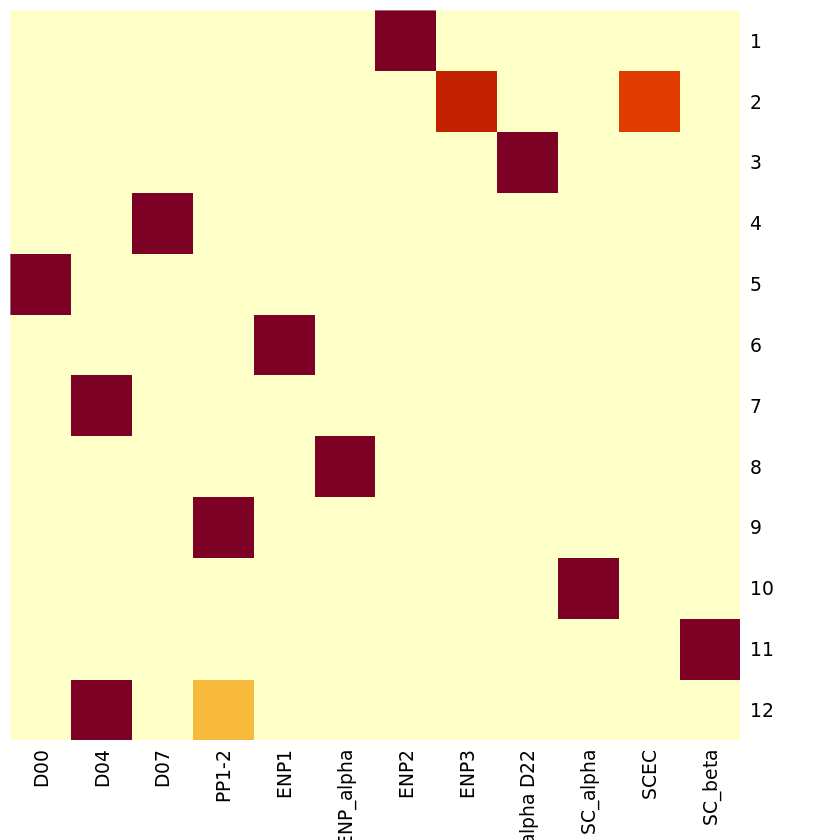

In [7]:
reorder <- c(1, 2, 3, 8, 4, 7, 5, 6, 9, 10, 12, 11)
H <- H[, reorder]
heatmap(H, Colv=NA, Rowv=NA, revC = T)

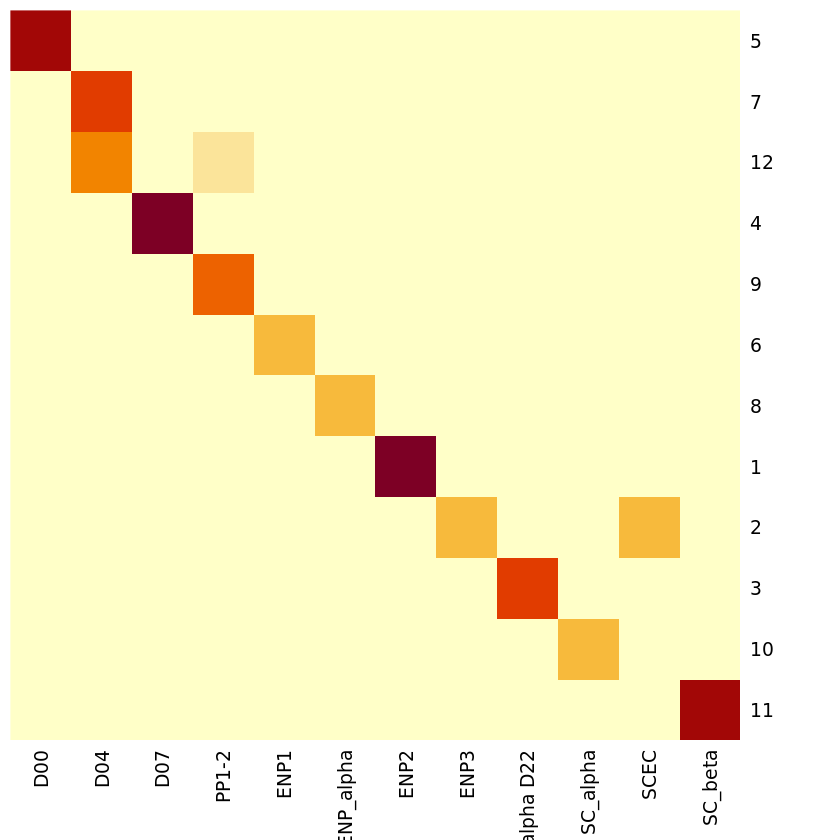

In [8]:
order<-c(5,7,12,4,9,6,8,1,2,3,10,11)
or<-H
rownames(or)<-c(1:12)
or<-or[order,]
heatmap(or, Colv=NA, Rowv=NA, revC = T, scale="none")

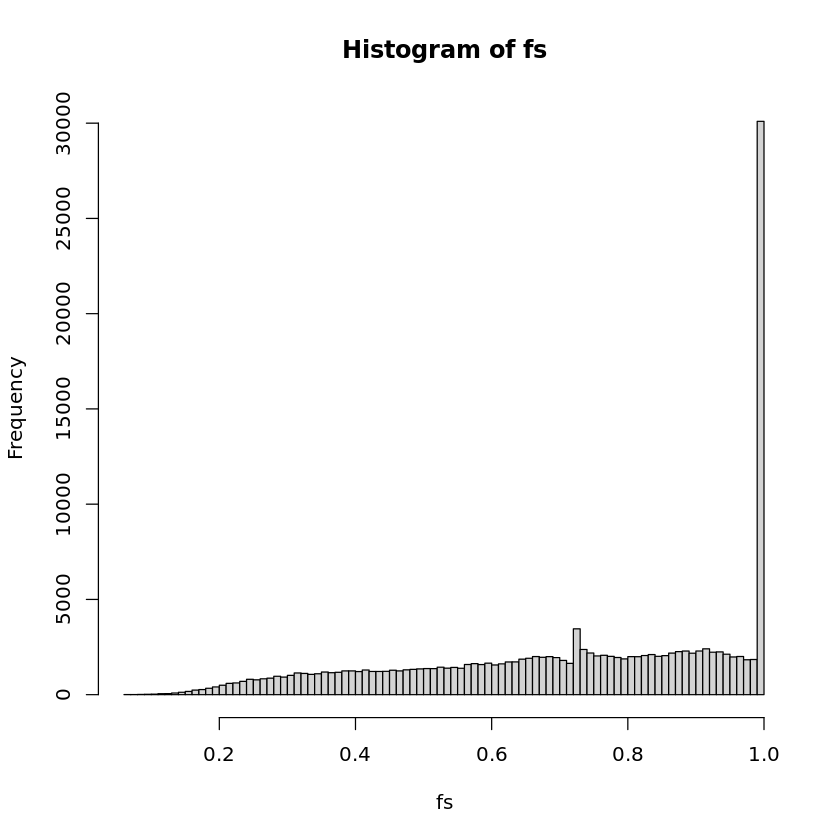

In [9]:
fs<-featureScore(nmf_result, method="kim")
hist(fs, breaks=100)

In [10]:
maxID<-apply(W, 1, which.max)

In [11]:
head(fs)
head(names(rev(sort(fs))))

chr1:9838-10289 chr1:17004-17296 chr1:28423-28779 chr1:39794-40086 
       0.2832435        0.7253369        0.3450728        0.8245960 
chr1:56786-57076 chr1:98881-99218 
       1.0000000        0.9170063

[1] "chrY:57194529-57194888" "chrY:26436643-26437145" "chrY:25386183-25386475"
[4] "chrY:25331649-25331940" "chrY:25154021-25154312" "chrY:24515792-24516187"

In [12]:
data1<-data[rev(sort(fs)),]
#print(fs)
fs<-fs[rownames(data)]
maxID<-maxID[rownames(data)]

In [13]:
order<-c(5,7,12,4,9,6,8,1,2,3,10,11)
i=1
data.sort<-data[names(maxID[maxID==order[i]]),]
for(i in 2:(length(order))){
   data.sort<-rbind(data.sort,data[names(maxID[maxID==order[i]]),])
   }

In [ ]:
options(repr.plot.width=8, repr.plot.height=8)
sample<-sort(sample(c(1:dim(data.sort)[1]), 50000)) 

## subsample heatmap
data.sort.sub<-as.matrix(data.sort[sample,])
maxID.sub<-maxID[rownames(data.sort.sub)]

## define module color
library(RColorBrewer)
col<-c(brewer.pal(name="Set1", n=9), brewer.pal(name="Set3", n=8), brewer.pal(name="Set2", n=7))

heatmap(data.sort.sub[, reorder], Colv=NA, Rowv=NA, scale="row", revC =  T, labRow = F, RowSideColors =  col[maxID.sub])
data.sort.sublog<-log10(data.sort.sub+1)
maxcpm<-4
data.sort.sublog[data.sort.sublog>maxcpm]<-maxcpm
heatmap(data.sort.sublog, Colv=NA, Rowv=NA, scale="none", revC =  T, labRow = F, RowSideColors =  col[maxID.sub])

In [62]:
data.sort.sub <- data.sort.sub[, reorder]
head(data.sort.sub)

,D00,D04,D07,PP1_2,ENP1,ENP2,ENP3,ENP.Alpha,SC.Alpha_D22,SC.Alpha,SC.Beta,SC.EC
chr1:1053227-1053671,199.16021,24.548863,3.213626,45.006250,0,14.587632,10.958184,0.000000,0.6427252,2.432498,0.000000,16.437275
chr1:1195403-1195746,109.58184,0.000000,2.045739,0.000000,0,0.000000,1.620848,0.000000,0.0000000,0.000000,0.000000,0.000000
chr1:1205898-1206250,58.35053,10.958184,49.790052,32.874551,0,0.000000,0.000000,1.620848,0.0000000,6.137216,1.928175,0.000000
chr1:1435354-1435890,2767.72408,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000
chr1:1612720-1613014,10.20046,0.000000,1.020753,1.475262,0,4.226171,0.000000,0.000000,0.0000000,0.000000,0.000000,2.416223
chr1:1633566-1633954,12.21178,6.081245,0.000000,3.648747,0,0.000000,0.000000,0.000000,0.0000000,0.000000,0.000000,0.000000


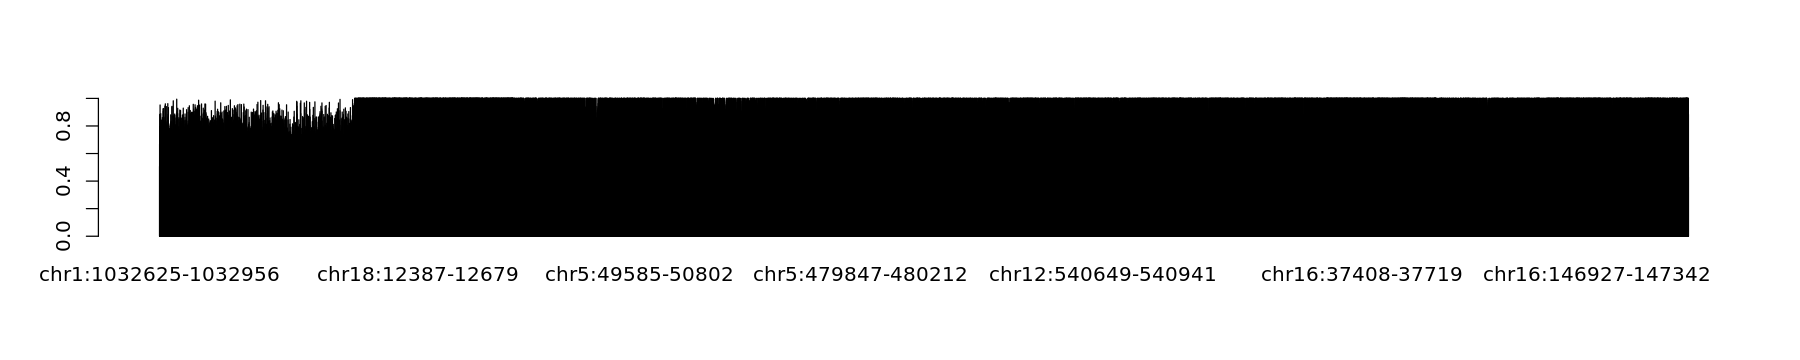

In [16]:
options(repr.plot.width=15, repr.plot.height=3)
barplot(fs[rownames(data.sort.sub)], xlab = NA)

In [17]:
table(maxID.sub);length(table(maxID.sub))

maxID.sub
   1    2    3    4    5    6    7    8    9   10   11   12 
1676 5190 3349 5588 3518 4055 3786 5375 4711 4459 5971 2322 

[1] 12

In [18]:
saveRDS(nmf_result, file = "nmf_DNAme3.rds")

In [75]:
output_file <- "module13.bed"

m1_data <- maxID[maxID == 13]
write.table(m1_data, file = output_file, quote = FALSE, sep = "\t")